In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 

In [3]:
data = pd.read_csv('C:/창원시/final_data.csv')
df = data.loc[:, ['traffic/area', 'avg_temp', 'dust_naver', 'f_pop/area', 'young_old/area']]
df.head()

,traffic/area,avg_temp,dust_naver,f_pop/area,young_old/area
0,4.205007,24.724592,23,42.515128,1.239300
1,0.556901,24.234239,23,0.101695,0.084618
2,1.292627,25.002491,7,31.810829,1.000228
3,4.942185,24.528216,21,18.904999,0.763345
4,13.589966,24.548234,23,171.009630,4.750404


In [4]:
df_corr = df.corr()

In [5]:
df_corr

,traffic/area,avg_temp,dust_naver,f_pop/area,young_old/area
traffic/area,1.000000,0.163315,-0.006756,0.570111,0.625967
avg_temp,0.163315,1.000000,-0.267562,0.434128,0.358022
dust_naver,-0.006756,-0.267562,1.000000,-0.110719,0.016648
f_pop/area,0.570111,0.434128,-0.110719,1.000000,0.870063
young_old/area,0.625967,0.358022,0.016648,0.870063,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lsb97_s4gev10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsb97_s4gev10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


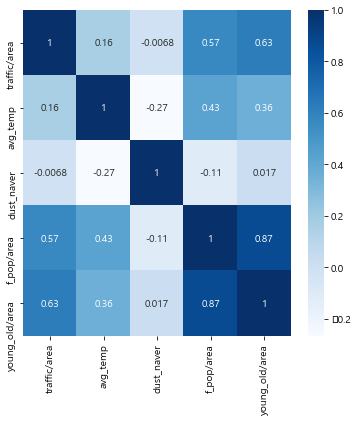

In [7]:
plt.figure(figsize=(6,6))
sns.heatmap(df_corr,cmap='Blues',annot=True)
plt.show()

# 면적대비 유동인구랑 면적대비 약자인구랑 상관관계 0.87로 높음
- 면적대비 약자인구 빼고 진행

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn

In [62]:
data = pd.read_csv('C:/창원시/final_data.csv')
data

,Unnamed: 0,시군구,읍면동,address,area,traffic,traffic/area,avg_temp,max_temp,t_dust,dust_airkorea,dust_naver,f_pop,f_pop/area,p_total,young_old,yo_ratio,young_old/area
0,22,마산합포구,현동,마산합포구 현동,1950.294,8201,4.205007,24.724592,35.099998,NaN,NaN,23,82917,42.515128,14111,2417,0.171285,1.239300
1,29,마산합포구,진전면,마산합포구 진전면,7846.994,4370,0.556901,24.234239,34.000000,NaN,NaN,23,798,0.101695,3900,664,0.170256,0.084618
2,4,의창구,북면,의창구 북면,7380.317,9540,1.292627,25.002491,37.500000,NaN,NaN,7,234774,31.810829,"43,445",7382,0.169916,1.000228
3,50,진해구,웅천동,진해구 웅천동,2888.601,14276,4.942185,24.528216,33.599998,NaN,NaN,21,54609,18.904999,"12,985",2205,0.169811,0.763345
4,44,진해구,풍호동,진해구 풍호동,813.615,11057,13.589966,24.548234,33.599998,13.400000,NaN,23,139136,171.009630,"25,822",3865,0.149679,4.750404
5,47,진해구,덕산동,진해구 덕산동,279.267,8179,29.287384,24.548234,33.599998,15.100000,NaN,23,95594,342.303244,"10,139",1378,0.135911,4.934346
6,25,마산합포구,진동면,마산합포구 진동면,3262.075,6943,2.128400,24.301857,34.000000,NaN,NaN,23,40333,12.364216,12174,1617,0.132824,0.495697
7,48,진해구,자은동,진해구 자은동,535.816,19137,35.715619,24.548234,33.599998,13.950000,NaN,23,63571,118.643340,"21,342",2807,0.131525,5.238739
8,15,마산합포구,월영동,마산합포구 월영동,272.345,9509,34.915273,25.162591,34.900002,20.260000,27.22103,23,334519,1228.291322,42000,5494,0.130810,20.172942
9,43,진해구,충무동,진해구 충무동,1833.321,26559,14.486825,24.548234,33.599998,43.610000,NaN,3,168068,91.674071,"16,947",2216,0.130761,1.208735


In [63]:
df1 = data.loc[:, ['traffic/area', 'avg_temp', 'dust_naver', 'f_pop/area']]
df1.head()

,traffic/area,avg_temp,dust_naver,f_pop/area
0,4.205007,24.724592,23,42.515128
1,0.556901,24.234239,23,0.101695
2,1.292627,25.002491,7,31.810829
3,4.942185,24.528216,21,18.904999
4,13.589966,24.548234,23,171.009630


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1)

In [65]:
df = pd.DataFrame(scaled)
df.columns=df1.columns
df.head()

,traffic/area,avg_temp,dust_naver,f_pop/area
0,0.015736,0.526044,0.954545,0.014457
1,0.000000,0.267464,0.954545,0.000000
2,0.003173,0.672590,0.227273,0.010808
3,0.018915,0.422488,0.863636,0.006409
4,0.056217,0.433044,0.954545,0.058255


C:\Users\lsb97_s4gev10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


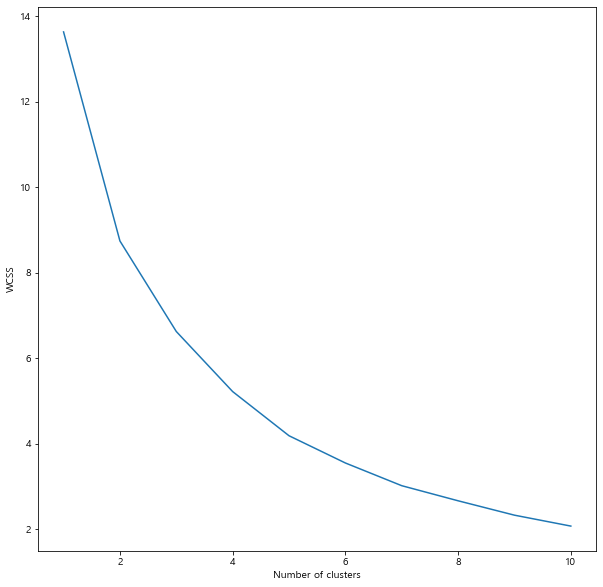

In [66]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(df)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
pca = PCA(2)
data = pca.fit_transform(df)

C:\Users\lsb97_s4gev10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsb97_s4gev10\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


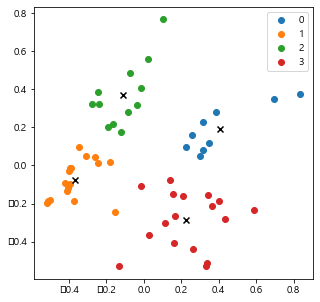

In [69]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(5,5))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
#별로 성능 안좋아보임

In [70]:
model.inertia_

2.177588322970628

In [71]:
df1['cluster'] = pd.Series(label)

In [72]:
df1['cluster'].value_counts()

3    17
1    17
2    12
0     9
Name: cluster, dtype: int64

In [73]:
import pandas as pd

df2 = pd.DataFrame(columns = df1.columns[:-1])
df2

,traffic/area,avg_temp,dust_naver,f_pop/area


In [74]:
c1=[]
c2=[]
c3=[]
c4=[]


for i in range(4):    
    c1.append(df1[df1['cluster']==i]['traffic/area'].mean())
    c2.append(df1[df1['cluster']==i]['avg_temp'].mean())
    c3.append(df1[df1['cluster']==i]['dust_naver'].mean())
    c4.append(df1[df1['cluster']==i]['f_pop/area'].mean())


In [75]:
df2['traffic/area']=c1
df2['avg_temp']=c2
df2['dust_naver']=c3
df2['f_pop/area']=c4


In [76]:
#군집별특징
df2


,traffic/area,avg_temp,dust_naver,f_pop/area
0,99.652209,25.352858,10.888889,1303.822538
1,17.577903,24.717828,22.529412,124.274216
2,114.790727,25.009001,22.000000,888.268211
3,19.365928,25.108626,9.411765,215.002180


In [77]:
data = pd.read_csv('C:/창원시/final_data.csv')

df1['address']=data['address']

In [78]:
dong0 = []
dong1 = []
dong2 = []
dong3 = []

data = pd.read_csv('C:/창원시/final_data.csv')
for i in range(len(df1)):
    if df1.iloc[i]['cluster']==0:
        dong0.append(df1.iloc[i]['address'])
    elif df1.iloc[i]['cluster']==1:
        dong1.append(df1.iloc[i]['address'])
    elif df1.iloc[i]['cluster']==2:
        dong2.append(df1.iloc[i]['address'])
    else:
        dong3.append(df1.iloc[i]['address'])

In [79]:
dong0

['마산회원구 양덕2동',
 '성산구 가음정동',
 '마산회원구 석전동',
 '성산구 반송동',
 '성산구 용지동',
 '성산구 상남동',
 '마산회원구 양덕1동',
 '마산회원구 구암2동',
 '마산회원구 합성2동']

In [80]:
dong1

['마산합포구 현동',
 '마산합포구 진전면',
 '진해구 웅천동',
 '진해구 풍호동',
 '진해구 덕산동',
 '마산합포구 진동면',
 '진해구 자은동',
 '마산합포구 진북면',
 '진해구 경화동',
 '마산합포구 구산면',
 '의창구 대산면',
 '마산회원구 회원2동',
 '마산합포구 가포동',
 '진해구 석동',
 '마산합포구 완월동',
 '성산구 웅남동',
 '마산회원구 봉암동']

In [81]:
dong2

['마산합포구 월영동',
 '진해구 태백동',
 '진해구 병암동',
 '마산합포구 교방동',
 '마산합포구 합포동',
 '마산합포구 반월중앙동',
 '마산합포구 오동동',
 '마산회원구 회원1동',
 '마산합포구 문화동',
 '마산합포구 자산동',
 '진해구 이동',
 '마산합포구 산호동']

In [82]:
dong3

['의창구 북면',
 '진해구 충무동',
 '진해구 여좌동',
 '진해구 웅동1동',
 '진해구 웅동2동',
 '마산회원구 합성1동',
 '의창구 의창동',
 '의창구 동읍',
 '마산회원구 내서읍',
 '마산회원구 회성동',
 '성산구 성주동',
 '성산구 사파동',
 '의창구 팔룡동',
 '마산회원구 구암1동',
 '성산구 중앙동',
 '의창구 명곡동',
 '의창구 봉림동']